In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/chipseq/'

/content/drive/My Drive/results/chipseq


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

  Using cached https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
ls

cnn_deep_exponential_results.pickle     cnn_shallow_relu_results.pickle
cnn_deep_relu_results.pickle            model_params/
cnn_shallow_exponential_results.pickle


In [6]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [7]:
results={}

In [8]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [9]:
for keys in results['deep_relu']:
    print(keys)
print()
for keys in results['deep_relu']['saliency']:
    print(keys)    

auc
saliency

scores
adj_scores
angles
ensemble_scores
ensemble_angles
dispersion
adj_dispersion


In [10]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

(10,)


In [11]:
#others

Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['saliency']['angles'])
Angles['deep_exp']=np.array(results['deep_exp']['saliency']['angles'])
Angles['shallow_relu']=np.array(results['shallow_relu']['saliency']['angles'])
Angles['shallow_exp']=np.array(results['shallow_exp']['saliency']['angles'])

Angles_ensemble={}
Angles_ensemble['deep_relu']=np.array(results['deep_relu']['saliency']['ensemble_angles'])
Angles_ensemble['deep_exp']=np.array(results['deep_exp']['saliency']['ensemble_angles'])
Angles_ensemble['shallow_relu']=np.array(results['shallow_relu']['saliency']['ensemble_angles'])
Angles_ensemble['shallow_exp']=np.array(results['shallow_exp']['saliency']['ensemble_angles'])

Scores={}
Scores['deep_relu']=np.array(results['deep_relu']['saliency']['scores'])
Scores['deep_exp']=np.array(results['deep_exp']['saliency']['scores'])
Scores['shallow_relu']=np.array(results['shallow_relu']['saliency']['scores'])
Scores['shallow_exp']=np.array(results['shallow_exp']['saliency']['scores'])

Scores_ensemble={}
Scores_ensemble['deep_relu']=np.array(results['deep_relu']['saliency']['ensemble_scores'])
Scores_ensemble['deep_exp']=np.array(results['deep_exp']['saliency']['ensemble_scores'])
Scores_ensemble['shallow_relu']=np.array(results['shallow_relu']['saliency']['ensemble_scores'])
Scores_ensemble['shallow_exp']=np.array(results['shallow_exp']['saliency']['ensemble_scores'])

Dispersion={}
Dispersion['deep_relu']=np.array(results['deep_relu']['saliency']['dispersion'])
Dispersion['deep_exp']=np.array(results['deep_exp']['saliency']['dispersion'])
Dispersion['shallow_relu']=np.array(results['shallow_relu']['saliency']['dispersion'])
Dispersion['shallow_exp']=np.array(results['shallow_exp']['saliency']['dispersion'])

Dispersion_adj={}
Dispersion_adj['deep_relu']=np.array(results['deep_relu']['saliency']['adj_dispersion'])
Dispersion_adj['deep_exp']=np.array(results['deep_exp']['saliency']['adj_dispersion'])
Dispersion_adj['shallow_relu']=np.array(results['shallow_relu']['saliency']['adj_dispersion'])
Dispersion_adj['shallow_exp']=np.array(results['shallow_exp']['saliency']['adj_dispersion'])

print(Angles['deep_relu'].shape)
print(Angles_ensemble['deep_relu'].shape)

(10, 1097, 200)
(1097, 200)


# ANGLE STATISTICS

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 

sine = np.array(Angles['deep_exp'])
sine_ensemble = np.array(Angles_ensemble['deep_exp'])

(array([1.30158898e-05, 1.04127119e-05, 2.34286017e-05, 2.60317797e-05,
        5.20635593e-05, 8.33016950e-05, 9.89207628e-05, 8.85080509e-05,
        1.74412924e-04, 1.69206568e-04, 2.08254237e-04, 2.83746398e-04,
        3.48825848e-04, 3.98285361e-04, 3.80063983e-04, 5.33651483e-04,
        5.98730932e-04, 6.97651695e-04, 7.88762924e-04, 8.90286865e-04,
        1.01784259e-03, 1.17923962e-03, 1.26254131e-03, 1.50724004e-03,
        1.70247468e-03, 2.09295509e-03, 2.16844725e-03, 2.54330487e-03,
        2.75936865e-03, 3.21492479e-03, 3.61581420e-03, 4.07137034e-03,
        4.53994237e-03, 5.32610212e-03, 5.95086483e-03, 6.58604026e-03,
        7.62470827e-03, 8.56704936e-03, 9.52502818e-03, 1.08969030e-02,
        1.25264924e-02, 1.35963985e-02, 1.52754483e-02, 1.69544889e-02,
        1.86335479e-02, 2.01902483e-02, 2.18536731e-02, 2.31214267e-02,
        2.42407899e-02, 2.46234570e-02, 2.51310767e-02, 2.42616154e-02,
        2.34155858e-02, 2.26684676e-02, 2.14293610e-02, 1.926091

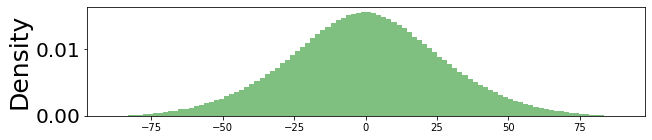

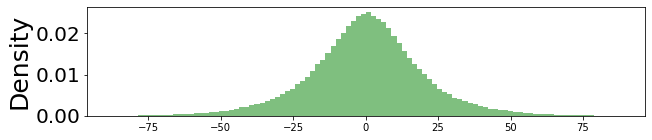

In [13]:
import matplotlib.pyplot as plt

sine_flattened = np.reshape(sine,[-1])  #sine.reshape(len(sine)*len(sine[0])*len(sine[0,0]),)
sine_ensemble_flattened = np.reshape(sine_ensemble,[-1]) 
#improvement_flattened = np.array(improvement.reshape(len(improvement)*len(improvement[0])*len(improvement[0,0]),))
#index = np.where(np.abs(improvement_flattened)>0)[0]  #No NAs
#sine_flattened=sine_flattened[index]

plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
#plt.xticks(fontsize=22)
#plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)   #Turn off x ticks
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_flattened, 100, density=True, alpha=0.5, color='g')

#second distribution 
plt.figure(figsize=(10,2))
plt.ylabel('Density', fontsize=25)
#plt.xticks(fontsize=22)
#plt.tick_params(axis='x',  which='both', bottom=False,  top=False, labelbottom=False)    #Turn off x ticks
plt.yticks(ticks=[0.0, 0.01, 0.02], fontsize=20)
plt.hist(sine_ensemble_flattened, 100, density=True, alpha=0.5, color='g')

In [17]:
print ( np.mean(np.nan_to_num(sine_flattened)) )
print ( np.std(np.nan_to_num(sine_flattened)) )
print(sine_flattened.shape)
print('\n',  np.std(np.nan_to_num(sine_ensemble_flattened)) )

-0.35861018
28.850561
(2194000,)

 20.76424


In [14]:
print ( np.mean(np.nan_to_num(sine_flattened)) )
print ( np.std(np.nan_to_num(sine_flattened)) )
print(sine_flattened.shape)
print('\n',  np.std(np.nan_to_num(sine_ensemble_flattened)) )

-0.0034976387
26.557108
(2194000,)

 19.906958


# Dispersion

In [15]:
dispersion=np.array(Dispersion['deep_exp'])
dispersion_adj=np.array(Dispersion_adj['deep_exp'])
print(sine.shape, '\n', dispersion.shape, dispersion_adj.shape)

(10, 1097, 200) 
 (10, 1097, 200) (10, 1097, 200)


In [16]:
# Dispersion bins
#Working on 10 runs - use the np.nan_to_num version 

#Fully flat (1D)
sine_flat = sine.reshape(-1)
dispersion_flat = dispersion.reshape(-1) 

sine_bins = np.arange(-90,90,5).astype(float)
dispersion_bins_sum =  (sine_bins * 0).astype(float)
dispersion_bins_count = (sine_bins * 0).astype(float)
#print (sine_bins)
#print(dispersion_flat[0:100])
#print(np.average(dispersion_flat))
for i in range (0, len(sine_flat)):
    bin = ((sine_flat[i]+90)/180 * len(sine_bins)).astype(int)
    if(not np.isnan(sine_flat[i]) ): # removing problematic resuls from NA and similar. 
        dispersion_bins_sum[bin]+=dispersion_flat[i] 
        dispersion_bins_count[bin]+=1

dispersion_bins = dispersion_bins_sum / dispersion_bins_count
#print(dispersion_bins_count)



#Corrected version
sine_flat = sine.reshape(-1)
dispersion_flat = dispersion_adj.reshape(-1) 

sine_bins = np.arange(-90,90,5).astype(float)
dispersion_bins_sum =  (sine_bins * 0).astype(float)
dispersion_bins_count = (sine_bins * 0).astype(float)
#print (sine_bins)
for i in range (0, len(sine_flat)):
    bin = ((sine_flat[i]+90)/180 * len(sine_bins)).astype(int)
    if(not np.isnan(sine_flat[i]) ): # removing problematic resuls from NA and similar.  
        dispersion_bins_sum[bin]+=dispersion_flat[i] 
        dispersion_bins_count[bin]+=1

dispersion_bins_corrected = dispersion_bins_sum / dispersion_bins_count



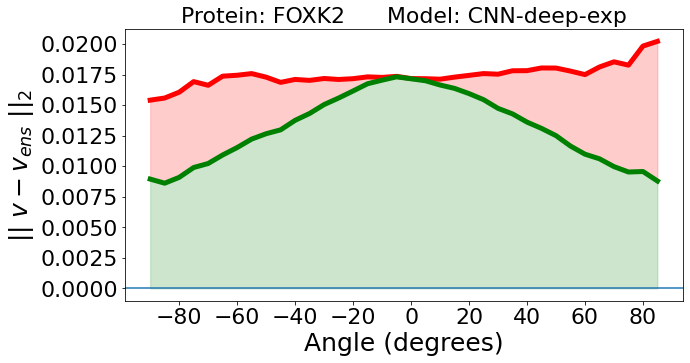

In [17]:
plt.figure(figsize=(10,5))
plt.plot(sine_bins, dispersion_bins, '-', color='red',linewidth=5.0)
plt.fill_between(sine_bins, dispersion_bins, dispersion_bins_corrected, color="red", alpha=0.2)
plt.xlabel('Angle (degrees)', fontsize=25)
plt.ylabel('|| $v - v_{ens}$ ||$_{2}$', fontsize=25)
plt.xticks([-80, -60, -40, -20, 0, 20, 40, 60, 80], fontsize=22)
plt.yticks( fontsize=22)
plt.axhline(0)
#plt.axvline(0)

plt.plot(sine_bins, dispersion_bins_corrected, '-', color='green', linewidth=5.0)
plt.fill_between(sine_bins, dispersion_bins_corrected, 0, color="green", alpha=0.2)

plt.title("Protein: FOXK2      Model: CNN-deep-exp", fontsize=22)

plt.show()

In [29]:
! pip install logomaker

     |████████████████████████████████| 11.8 MB 10.1 MB/s 


In [27]:
print(Scores['deep_exp'].shape)

(10, 1097, 200, 4)


# ANECDOTAL (last...)

In [ ]:
! pip install logomaker
import logomaker

In [ ]:
saliency_map_raw
saliency_map_raw_CORRECTED = np.array(saliency_map_raw) - 0.25 * np.sum(saliency_map_raw, axis=2, keepdims=True) 

s=9 #Pick a sequence 42
run_=2

X_50=[]
for i in range (0,len(saliency_map_raw_cummulative)):
    X_50.append(X)   
X_50=np.array(X_50)  

sine_dimensionsadapted=np.expand_dims(sine,3)[run_] * np.sqrt(np.sum(np.square(saliency_map_raw),axis=2,keepdims=True))

from matplotlib.ticker import FormatStrFormatter

import logomaker 

# PLOT for p=0 parameter (default classical saliency)
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=-0.333 parameter 
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = saliency_map_raw_CORRECTED[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT ground truth
N, L, A = sine_dimensionsadapted.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('∧'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = (sine_dimensionsadapted)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    fig = plt.gcf()


# PLOT ground truth
N, L, A = attr_score1.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

In [ ]:
'''!pip install https://github.com/p-koo/tfomics/tarball/master

"# PLOT ground truth\nN, L, A = scores.shape\nfor i in range(s,s+1):   #for i in range(len(X)):\n    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))\n    for a in range(A):\n        for l in range(L):\n            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] \n\n    logomaker.Logo(counts_df, figsize=(25,2))\n    ax = plt.gca()\n    ax.spines['right'].set_visible(False)\n    ax.spines['top'].set_visible(False)\n    #ax.yaxis.set_ticks_position('none')\n    #ax.xaxis.set_ticks_position('none')\n    #plt.xticks([])\n    #plt.yticks([])\n    #plt.ylim((-0.05,0.05)) \n    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))\n    fig = plt.gcf()"

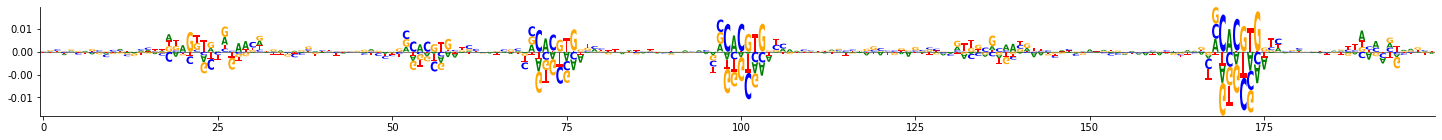

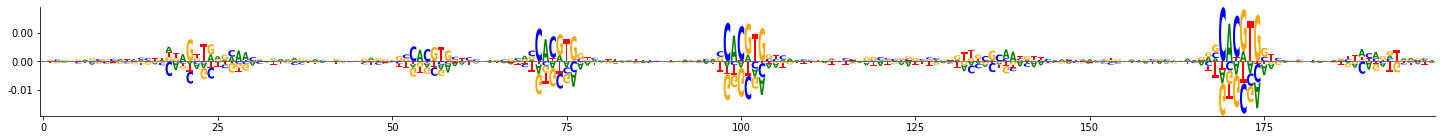

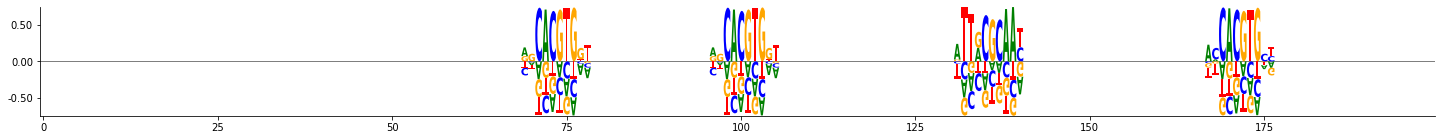

In [ ]:
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
s=1 #Pick a sequence 42

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()


# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = adj_scores[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

# PLOT for p=0 parameter (default classical saliency)
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = X_model_centered[i][l,a]

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()

'''# PLOT ground truth
N, L, A = scores.shape
for i in range(s,s+1):   #for i in range(len(X)):
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = np.swapaxes(X_model-0.25, 1,2)[i][l,a] #(np.swapaxes(X_model, 1,2)*X)[i][l,a] 

    logomaker.Logo(counts_df, figsize=(25,2))
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.yaxis.set_ticks_position('none')
    #ax.xaxis.set_ticks_position('none')
    #plt.xticks([])
    #plt.yticks([])
    #plt.ylim((-0.05,0.05)) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    fig = plt.gcf()'''